# Проект по А/B-тестированию

__Цель исследования__ — провести оценку результатов A/B-теста по поводу тестирования изменений, связанных с внедрением улучшенной рекомендательной системы. 

__Задачи исследования:__
- Оценка корректности проведения теста
- Анализ результатов теста

__Выполненные задачи в рамках проекта:__ <br>
- приведены данные к нужным типам и обработаны пропущенные значения и дубликаты;
- проведен анализ конверсии в воронке на разных этапах;
- построена гистограмма по распределению событий по дням;
- оценка корректности проведения теста;
- оценка результатов A/B-тестирования;
- проверка статистической разницы долей z-критерием;
- описание выводов по этапу исследовательского анализа данных и по проведённой оценке результатов A/B-тестирования.

### Содержание
<ul style="list-style:none; text-decoration: none">
    <li><a style="text-decoration: none" href="#introduction">1. Загрузка данных и подготовка их к анализу</a></li>
    <li><a style="text-decoration: none" href="#data_pre-processing">2. Подготовка данных</a></li>
    <li><a style="text-decoration: none" href="#analysis">3. Проведение исследовательского анализа </a></li>
    <li><a style="text-decoration: none" href="#research_analysis">4. Проверка гипотез и анализ A/B теста</a></li>
    <li><a style="text-decoration: none" href="#conclusion">5. Выводы проекта</a></li>
</ul>

## 1.  Загрузка данных и подготовка их к анализу <a name="introduction"></a> 

In [1]:
#Импортирую библиотеку
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from plotly import graph_objects as go
import plotly.express as px
import math as mth
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns

Импортирую библиотеку Pandas и с помощью метода .read_csv() создаю четыре ноывых DataFrame __events__, __new_users__, __participants__ и __marketing_events__.

In [2]:
events = pd.read_csv("final_ab_events.csv")
new_users = pd.read_csv("final_ab_new_users.csv")
participants = pd.read_csv("final_ab_participants.csv")
marketing_events = pd.read_csv("ab_project_marketing_events.csv")

Создаю функцию для получения основной информации о датафрейме

In [3]:
def data_describe(dataframe):
    display(dataframe.head(10))
    display(dataframe.describe())
    dataframe.info()

Пропускаю датафрейсы через цикл

In [4]:
dataframe_list = [events, new_users, participants, marketing_events]

for x in dataframe_list: # Применяю метод .info() ко всем датафреймам по очереди
    print(data_describe(x))   # Применяю метод .info()
    print('')

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99
6,6B2F726BFD5F8220,2020-12-07 11:27:42,purchase,4.99
7,BEB37715AACF53B0,2020-12-07 04:26:15,purchase,4.99
8,B5FA27F582227197,2020-12-07 01:46:37,purchase,4.99
9,A92195E3CFB83DBD,2020-12-07 00:32:07,purchase,4.99


,details
count,62740.000000
mean,23.877631
std,72.180465
min,4.990000
25%,4.990000
50%,4.990000
75%,9.990000
max,499.990000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB
None



,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone
5,137119F5A9E69421,2020-12-07,N.America,iPhone
6,62F0C741CC42D0CC,2020-12-07,APAC,iPhone
7,8942E64218C9A1ED,2020-12-07,EU,PC
8,499AFACF904BBAE3,2020-12-07,N.America,iPhone
9,FFCEA1179C253104,2020-12-07,EU,Android


,user_id,first_date,region,device
count,61733,61733,61733,61733
unique,61733,17,4,4
top,66573DD3643B60B3,2020-12-21,EU,Android
freq,1,6290,46270,27520


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB
None



,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test
5,4FF2998A348C484F,A,recommender_system_test
6,7473E0943673C09E,A,recommender_system_test
7,C46FE336D240A054,A,recommender_system_test
8,92CB588012C10D3D,A,recommender_system_test
9,057AB296296C7FC0,B,recommender_system_test


,user_id,group,ab_test
count,18268,18268,18268
unique,16666,2,2
top,4A6D170E2EA305F0,A,interface_eu_test
freq,2,9655,11567


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB
None



,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


,name,regions,start_dt,finish_dt
count,14,14,14,14
unique,14,6,14,14
top,International Women's Day Promo,APAC,2020-05-01,2020-04-19
freq,1,4,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes
None



Получаем следующую структуру таблицы __``events``__:
 
* Количество столбцов: __4__
* Количество строк: __440317__
* Тип данных в столбцах: __float64(1), object(3)__

Получаем следующую структуру таблицы __``new_users``__:
* Количество столбцов: __4__
* Количество строк: __61733__
* Тип данных в столбцах: __object(4)__

Получаем следующую структуру таблицы __``participants``__:
* Количество столбцов: __5__
* Количество строк: __18268__
* Тип данных в столбцах: __object(3)__

Получаем следующую структуру таблицы __`` marketing_events``__:
* Количество столбцов: __4__
* Количество строк: __14__
* Тип данных в столбцах: __object(4)__

## 2. Подготовка данных <a name="data_pre-processing"></a>

В данном блоке проведем следующую работу:

- приведем данные данные к нужным типам;
- удалим дубликаты, если они имеются;
- проведем работу с пропусками при их наличии;
- исправим ошибки в данных. То есть в данном этапе подгатавливаем данные к анализу.

In [5]:
print('\nКоличество дубликатов в датафрейме: {}\n'.format(events.duplicated().sum()))
print('\nКоличество дубликатов в датафрейме: {}\n'.format(new_users.duplicated().sum()))
print('\nКоличество дубликатов в датафрейме: {}\n'.format(participants.duplicated().sum()))
print('\nКоличество дубликатов в датафрейме: {}\n'.format(marketing_events.duplicated().sum()))


Количество дубликатов в датафрейме: 0


Количество дубликатов в датафрейме: 0


Количество дубликатов в датафрейме: 0


Количество дубликатов в датафрейме: 0



Заменим все пропушенные значения в __events['details']__ на 0

In [6]:
events['details'] = events['details'].fillna(0)
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     440317 non-null  float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


Создаем функцию которая переводит тип столбца в даты.

In [7]:
#Создаем функцию которая переводит тип столбца в даты. Параметрами функции является date (название DateFreim) и row (название столбца)
def datetime(date, row):
    date[row] = pd.to_datetime(date[row])

Переведем необходимые столбцы в датафрейме, а именно из объекта в дату.

In [8]:
datetime(events, 'event_dt')
datetime(new_users, 'first_date')
datetime(marketing_events, 'start_dt')
datetime(marketing_events, 'finish_dt')

__Выводы:__
Данные подготовлены к работе для анализа. Так в датафрейме __events__ у нас были заменены все пропущенные значения в столбцах 'details' на ноль, так как именно эти значения не предполагали цифр. Были переведены столбцы  в другой тип данных, из объекта в дату.

## 3. Проведение исследовательского анализа <a name="analysis"></a> 

Проанализируем конверсию в воронке на разных этапах. Для это объединим датафреймы __events__ и __participants__. Затем посмотрим сколько событий в тесте __recommender_system_test__ и __interface_eu_test__. В целом можно говорить, о том, что выборка теста  __interface_eu_test__ в четыре раза больше, чем выборка __recommender_system_test__. При этом видна разница между соотношением теста __interface_eu_test__ и __recommender_system_test__, если в первом случае соотношение примерно равно, то во втором случае в группе A перекос составляет три раза. 

In [9]:
#Объединим датафреймы events и participants
eventsAB = events.merge(participants, on='user_id', how='outer')
#Объединим датафреймы events и new_users
eventsAB = eventsAB.merge(new_users, on='user_id') 
#Создадим столбец с датой
eventsAB['date'] = eventsAB['event_dt'].dt.date
#Созданих датафрейм на группу A и группу B
eventsCount = eventsAB.groupby(['ab_test', 'group'])['user_id'].agg({'nunique'})
eventsCount

nunique
ab_test                 group         
interface_eu_test       A         5831
                        B         5736
recommender_system_test A         3824
                        B         2877

Затем разделим на две группы датафрейм, на группу А и группу B c названием теста: recommender_system_test;позволит разделить на две группы датафрейм, на группу А и группу B c названием теста: recommender_system_test;

In [10]:
eventsA = eventsAB.query('group == "A" and ab_test == "recommender_system_test"')
eventsB = eventsAB.query('group == "B" and ab_test == "recommender_system_test"')

Затем посчитаем количество пользователей в разрезе событий с помощью метода  __groupby()__.

In [11]:
#Создаем Series группы A
eventNameCountA = eventsA.groupby('event_name')['user_id'].agg(['count', 'nunique']).reset_index().sort_values(by='count', ascending=False)
#Создаем Series группы B
eventNameCountB = eventsB.groupby('event_name')['user_id'].agg(['count', 'nunique']).reset_index().sort_values(by='count', ascending=False)
print(eventNameCountA)
print(' ')
print(' ')
print(' ')
print(eventNameCountB)

     event_name  count  nunique
0         login   8566     2747
2  product_page   5525     1780
3      purchase   2655      872
1  product_cart   2558      824
 
 
 
     event_name  count  nunique
0         login   2624      928
2  product_page   1405      523
1  product_cart    689      255
3      purchase    676      256


Видим, что шаг оплаты посещают чаще, чем корзину, проверим данные результаты. Построим продуктовую воронку с учетом последовательности событий. 

In [12]:
usersA = eventsA.pivot_table(
    index='user_id', columns='event_name', values='event_dt', aggfunc='min'
) 

step_1 = ~usersA['login'].isna()
step_2 = step_1 & (usersA['product_page'] > usersA['login'])
step_3 = step_2 & (usersA['product_cart'] > usersA['product_page'])
step_4 = step_3 & (usersA['purchase'] > usersA['product_cart'])

n_loginA = usersA[step_1].shape[0]
n_product_pageA = usersA[step_2].shape[0]
n_product_cartA = usersA[step_3].shape[0]
n_paymentA = usersA[step_4].shape[0]

print('Логин:', n_loginA)
print('Страница продукта:', n_product_pageA)
print('Добавили в корзину:', n_product_cartA)
print('Оплатили:', n_paymentA)

Логин: 2747
Страница продукта: 1012
Добавили в корзину: 54
Оплатили: 0


In [13]:
usersB = eventsB.pivot_table(
    index='user_id', columns='event_name', values='event_dt', aggfunc='min'
) 

step_1 = ~usersB['login'].isna()
step_2 = step_1 & (usersB['product_page'] > usersB['login'])
step_3 = step_2 & (usersB['product_cart'] > usersB['product_page'])
step_4 = step_3 & (usersB['purchase'] > usersB['product_cart'])

n_loginB = usersB[step_1].shape[0]
n_product_pageB = usersB[step_2].shape[0]
n_product_cartB = usersB[step_3].shape[0]
n_paymentB = usersB[step_4].shape[0]

print('Логин:', n_loginB)
print('Страница продукта:', n_product_pageB)
print('Добавили в корзину:', n_product_cartB)
print('Оплатили:', n_paymentB)

Логин: 928
Страница продукта: 284
Добавили в корзину: 23
Оплатили: 1


На основе продуктовой воронки с учетом последовательности можно сделать вывод, что после добавления в корзину практически не происходит оплата. Надо дальше разбираться с данными.Проанализируем отдельно поведение одного пользователя. Как мы видим в данных очень много ощибок, а именно есть события которые пользователь совершил в одно время, что является безусловно странным.

In [14]:
eventsA[eventsA['user_id'] == '3C5DD0288AC4FE23']

,user_id,event_dt,event_name,details,group,ab_test,first_date,region,device,date
144,3C5DD0288AC4FE23,2020-12-07 19:42:40,purchase,4.99,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07
145,3C5DD0288AC4FE23,2020-12-07 19:42:40,product_page,0.00,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07
146,3C5DD0288AC4FE23,2020-12-07 19:42:40,login,0.00,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07


В данном случае перейдем в анализу выбросов.

###### Анализ выбросов

Проанализируем вводные данные на выбросы. Для это создадим новый датафрейм по количеству событий на одного пользователя с помощью метода __groupby()__. Затем постороим гистонрамму.

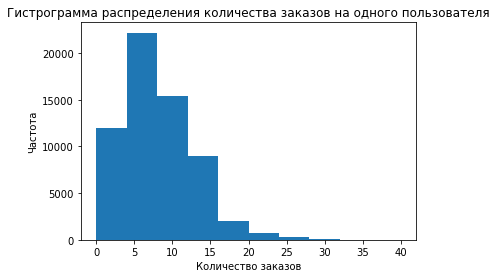

In [15]:
#Создалим данные по количеству событий на одного пользователя 
eventByUsers = eventsAB.groupby('user_id').agg({'event_name':'count'}).reset_index()

#Построим гистограмму
plt.hist(eventByUsers['event_name'])
plt.title('Гистрограмма распределения количества заказов на одного пользователя')
plt.xlabel('Количество заказов')
plt.ylabel('Частота');

Построим точечную диаграмму числа заказов на одного пользователя. Выводы подтверждаются: много пользователей с 5-7 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет. Построим точечную диаграмму числа заказов на одного пользователя

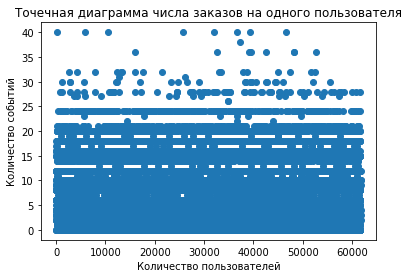

In [16]:
#Построим распределение по числу заказов на одного пользователя

x_values = pd.Series(range(0,len(eventByUsers)))

plt.scatter(x_values, eventByUsers['event_name'])
plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество событий');

In [17]:
np.percentile(eventByUsers['event_name'], [95, 99])

array([16., 21.])

Не более 5% пользователей оформляли больше чем 15 заказов. И 1% пользователей заказывали более 20 раз. Разумно избавиться от этих данных.

Теперь посмотрим на выбросы в сумме выручки. Для этого построим сумму, которая приходится на одного пользователя. 

In [18]:
detailsByUsers = eventsAB.groupby('user_id').agg({'details':'sum'}).reset_index()
detailsByUsers.sort_values(by='details', ascending=False).head(10)

,user_id,details
38188,9E4A562DC7FE3F82,1609.94
21527,59390C0379937AB0,1409.92
28924,788C61EDBDD38346,1239.90
35837,94464DF2E5398E26,1219.92
37601,9BBC25973E2B9763,1124.93
54254,E1159E32EB27E60D,1119.93
42254,AEEAC27AD37EFE7A,1114.95
10393,2B11361D0BDB293A,1114.94
36898,98BBEAC709DEC9EC,1109.95
45882,BE2A590658875C91,1109.95


Гистограмма показывает, что в основном сумма близка к нулю.

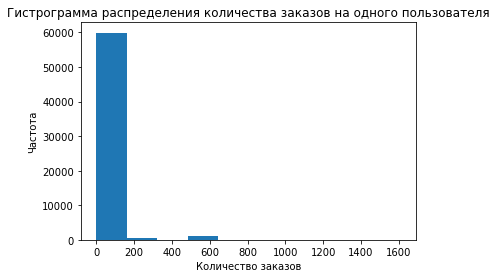

In [19]:
#Построим гистограмму
plt.hist(detailsByUsers['details'])
plt.title('Гистрограмма распределения количества заказов на одного пользователя')
plt.xlabel('Количество заказов')
plt.ylabel('Частота');

Построим точечный график стоимостей заказов

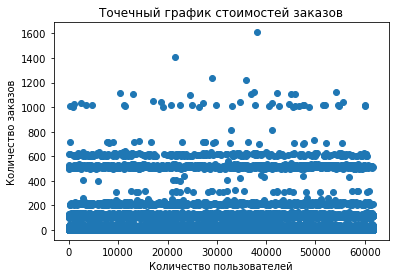

In [20]:
x_values = pd.Series(range(0,len(eventByUsers)))

plt.scatter(x_values, detailsByUsers['details'])
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов');

Не более 5% заказов дороже 114 и не более 1% дороже 509 рублей. Разумно избавиться от этих данных.

In [21]:
np.percentile(detailsByUsers['details'], [95, 99])

array([119.95, 514.97])

Переделаем данные на основе полученных выводов.

Видим, что основные показатели у групп примерно равны, однако максимальные значения сильно выше третьего квартиля, выделим пользователей с аномально большой активностью и большой суммой покупок из объединенной группы.

In [22]:
usersWithManyEvents = eventByUsers[eventByUsers['event_name']> np.percentile(eventByUsers['event_name'], 95)]['user_id']
usersWithBigPurchases= detailsByUsers[detailsByUsers['details']>np.percentile(detailsByUsers['details'], 95)]['user_id']

Этих пользователей не будем учитывать при анализе конверсии

In [23]:
finalEventsA = eventsA[~np.logical_or(eventsA['user_id'].isin(usersWithManyEvents),
                                              eventsA ['user_id'].isin(usersWithBigPurchases))]
finalEventsB = eventsB[~np.logical_or(eventsB['user_id'].isin(usersWithManyEvents),
                                              eventsB['user_id'].isin(usersWithBigPurchases))]

Подсчитаем по новым данным события по количеству уникальных пользователей

In [24]:
#Посчитаем количество событий по группе A
eventNameCountFinalA = finalEventsA.groupby('event_name')['user_id'].agg(['count', 'nunique']).reset_index().sort_values(by='nunique', ascending=False)
#Посчитаем количество событий по группе B
eventNameCountFinalB = finalEventsB.groupby('event_name')['user_id'].agg(['count','nunique']).reset_index().sort_values(by='nunique', ascending=False)

Строим функцию, которая будет нам строить продуктовые воронки

In [25]:
#Построим график
def goFigire(data, name):
    fig = go.Figure(go.Funnel(
        y = data["event_name"],
        x = data['count'],
        textinfo = "value+percent initial"))
    fig.update_layout(
        title={
            'text':'Продуктовая воронка по количеству событий по группе ' + name,
            'y':0.9,
            'x':0.48})
    fig.show(renderer='svg')
    
    fig = go.Figure(go.Funnel(
        y = data["event_name"],
        x = data['nunique'],
        textinfo = "value+percent initial"))
    fig.update_layout(
        title={
            'text':'Продуктовая воронка по количеству событий по группе ' + name,
            'y':0.9,
            'x':0.48})
    fig.show(renderer='svg')
    
    
    fig = go.Figure(go.Funnel(
        y = data["event_name"],
        x = data['nunique'],
        textinfo = "value+percent previous"))
    fig.update_layout(
        title={
            'text':'Продуктовая воронка (% от предыдущего события) по группе ' + name,
            'y':0.9,
            'x':0.48})
    fig.show(renderer='svg')   

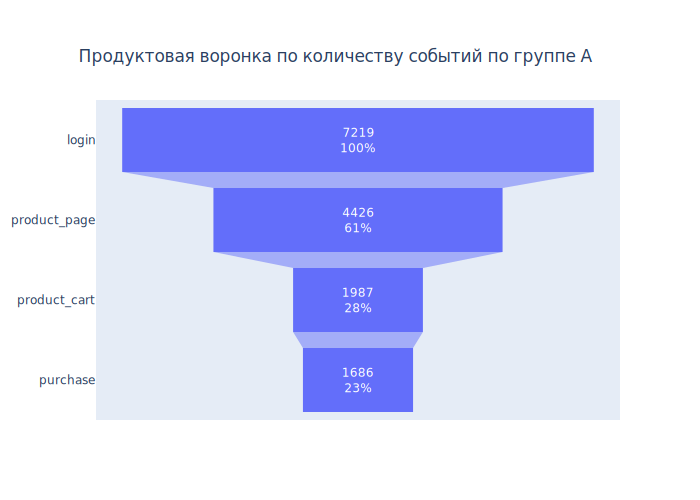

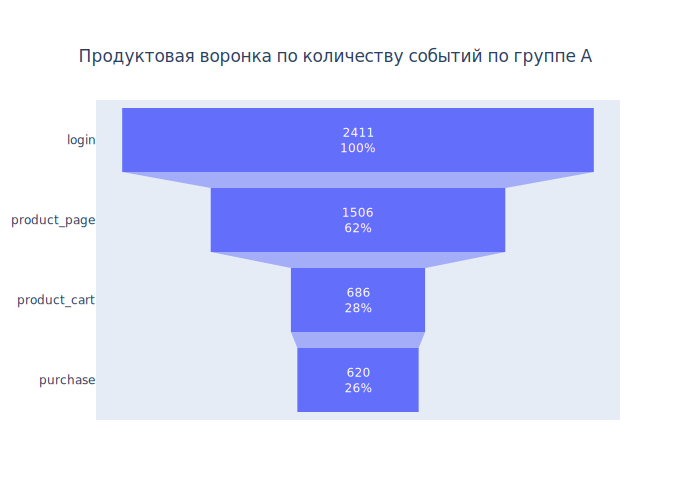

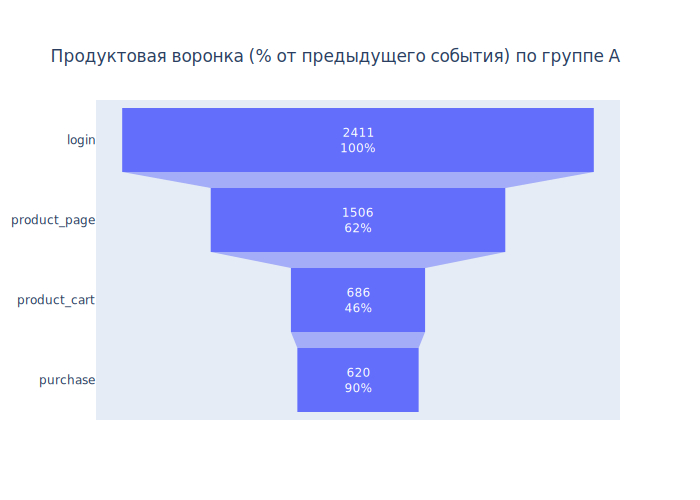

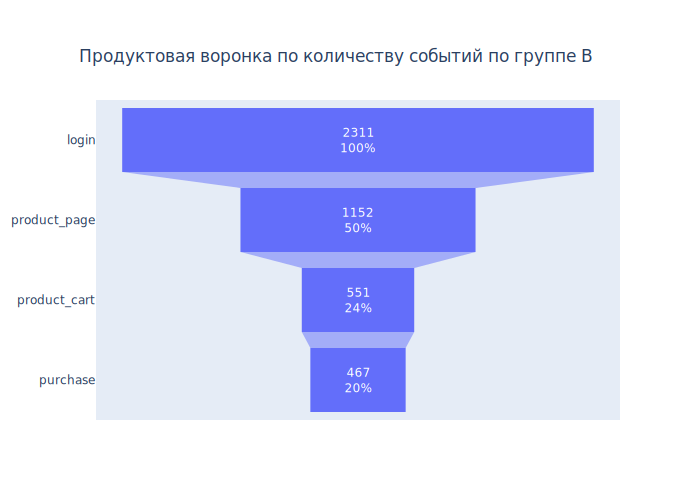

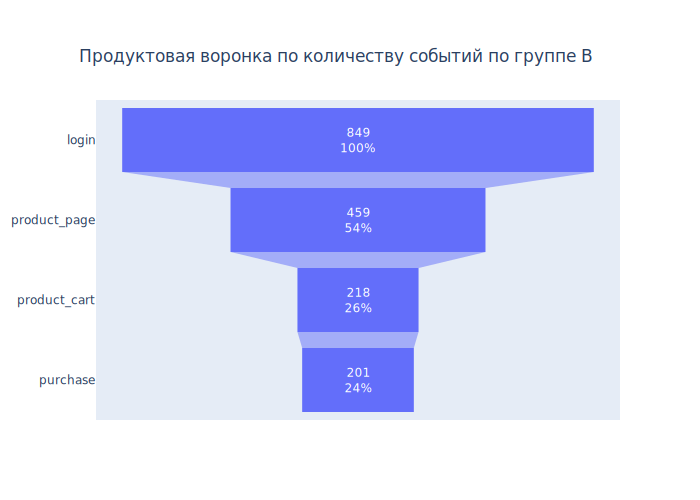

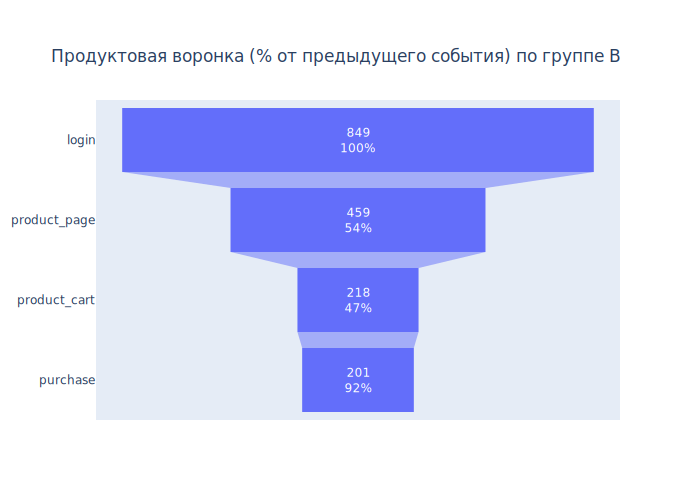

In [26]:
goFigire(eventNameCountFinalA, "А")
goFigire(eventNameCountFinalB, "B")

Исходя из полученных продуктовых воронок можно сделать выводы, что обе группы обладают одинаковой конверсией в районе 23-24%.

Исходя из полученных продуктовых воронок можно сделать выводы, что группа обладает большей конверсией чем группа B. Так количество людей, которые покупают по группе A составляет 32%, а по группе B - 27%. 

In [27]:
print('Количество событий в выборке А в тесте recommender_system_test {}'.format(eventNameCountFinalA['count'].sum()))
print('Количество человек в выборке А в тесте recommender_system_test {}'.format(eventsA['user_id'].nunique()))
print('Количество событий на человека в выборке А в тесте recommender_system_test составляет {}'.format((eventNameCountFinalA['count'].sum()/eventsA['user_id'].nunique()).round(1)))

Количество событий в выборке А в тесте recommender_system_test 15318
Количество человек в выборке А в тесте recommender_system_test 3824
Количество событий на человека в выборке А в тесте recommender_system_test составляет 4.0


In [28]:
print('Количество событий в выборке B в тесте recommender_system_test {}'.format(eventNameCountFinalB['count'].sum()))
print('Количество человек в выборке B в тесте recommender_system_test {}'.format(eventsB['user_id'].nunique()))
print('Количество событий на человека в выборке B  в тесте recommender_system_test составляет {}'.format((eventNameCountFinalB['count'].sum()/eventsB['user_id'].nunique()).round(1)))

Количество событий в выборке B в тесте recommender_system_test 4481
Количество человек в выборке B в тесте recommender_system_test 2877
Количество событий на человека в выборке B  в тесте recommender_system_test составляет 1.6


Посмотрим присутствуют ли в выборках одни и те же пользователи. Рассмотрим вначале сколько всего общих пользователей.

In [29]:
usersInBoth = eventsAB.groupby('group',as_index = False).agg({'user_id':'unique'})
usersInBoth = list(set(usersInBoth[usersInBoth['group'] == 'A']['user_id'][0]) &
                   set(usersInBoth[usersInBoth['group'] == 'B']['user_id'][1]))
print('Пользователей в двух пользовательских группах: ',len(usersInBoth))
print('Доля подобных пользователей в датафрейме eventsAB составляет: {:.1%}'.format(len(usersInBoth)/eventsAB['user_id'].nunique()))
print('Доля подобных пользователей в тесте recommender_system_test в датафрейме eventsAB составляет: {:.1%}'.format(len(usersInBoth)/eventsAB.query('ab_test == "recommender_system_test"')['user_id'].nunique()))

Пользователей в двух пользовательских группах:  776
Доля подобных пользователей в датафрейме eventsAB составляет: 1.3%
Доля подобных пользователей в тесте recommender_system_test в датафрейме eventsAB составляет: 11.6%


Проверим сколько одинаковых пользователей в тесте recommender_system_test.

In [30]:
usersInBothSystem = eventsAB.query('ab_test == "recommender_system_test"').groupby('group',as_index = False).agg({'user_id':'unique'})
usersInBothSystem = list(set(usersInBothSystem[usersInBothSystem['group'] == 'A']['user_id'][0]) &
                   set(usersInBothSystem[usersInBothSystem['group'] == 'B']['user_id'][1]))
print('Пользователей в двух пользовательских группах: ',len(usersInBothSystem))

Пользователей в двух пользовательских группах:  0


Не будет трогать подобные данные, так как нет ничего в этом критического, главное чтобы метки были сбалансированы.

###### Распределение событий по датам

Затем распределим события по дням. Для этого построим график.

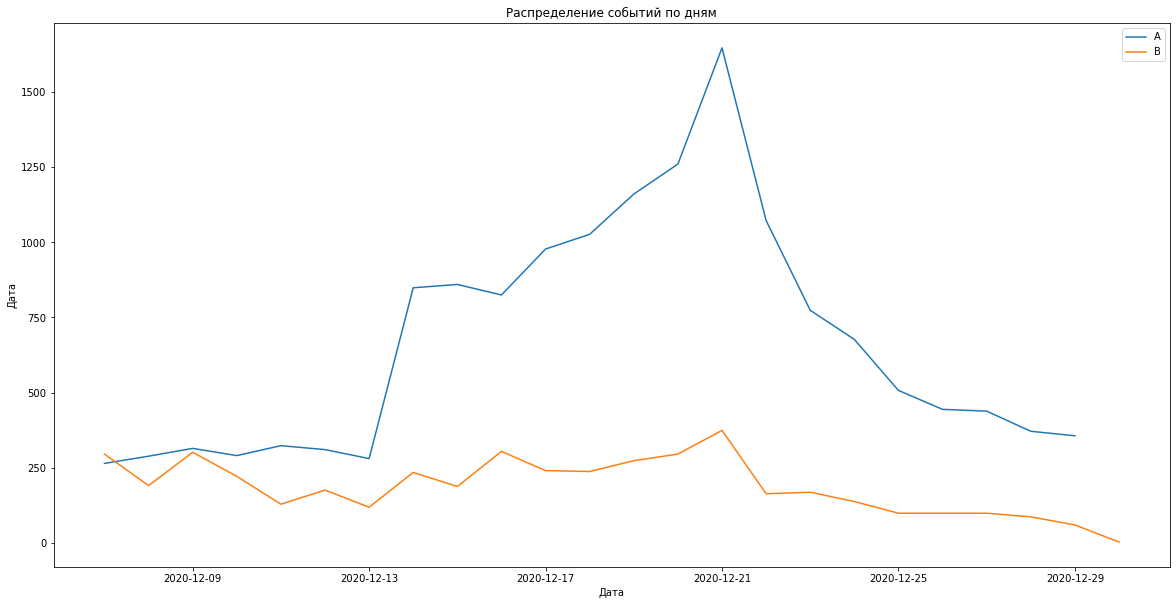

In [31]:
#Группириуем данные по дате 
eventNumberCountA = finalEventsA.groupby('date').agg({'event_name': 'count'}).reset_index()
eventNumberCountB = finalEventsB.groupby('date').agg({'event_name': 'count'}).reset_index()

plt.figure(figsize=(20, 10))
plt.title('Распределение событий по дням')
plt.plot(eventNumberCountA['date'], eventNumberCountA['event_name'], label='A')
plt.xlabel('Дата')
plt.ylabel('Дата')
     # Строим график выручки группы B
plt.plot(eventNumberCountB['date'], eventNumberCountB['event_name'], label='B')
    
plt.legend();


Как видно из графика по группе А наблюдается резкий всплеск с 13 декабря 2021 года и пика достигает 21 декабря 2021 года, затем идет резкое падение. Скорее всего здесь можно наблюдать определенные выбросы.

Теперь рассмотрим совпадал ли тест по времени с какими-нибудь маркетинговыми событиями. Для этого вычислим начало теста и конец его.

In [32]:
print('Время начало проведение теста -', events['event_dt'].min())
print('Время окончания теста -', events['event_dt'].max())

Время начало проведение теста - 2020-12-07 00:00:33
Время окончания теста - 2020-12-30 23:36:33


Посмотрим датафрейм с маркетинговыми мероприятиями.

In [33]:
marketing_events.query('start_dt > "2020-12-01"')

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
10,CIS New Year Gift Lottery,CIS,2020-12-30,2021-01-07


В Европе и Северной Америке наблюдается с 25 декабря наблюдается Рождество и Новый год, а в СНГ страны готовятся к новогодним праздникам. Активность по тесту начало падать с 21 января 2021 года, но тест еще не закончился, однако он заходит на период длительной акции, что может помешать верному трактованию теста.

###### Региональная принадлежность пользователей. 

Рассмотрим региональную принадлежность пользователей для теста recommender_system_test. Исходя из данных видно что 94,7% новых пользователей составляют люди из EU, что является очень высоким показателем.

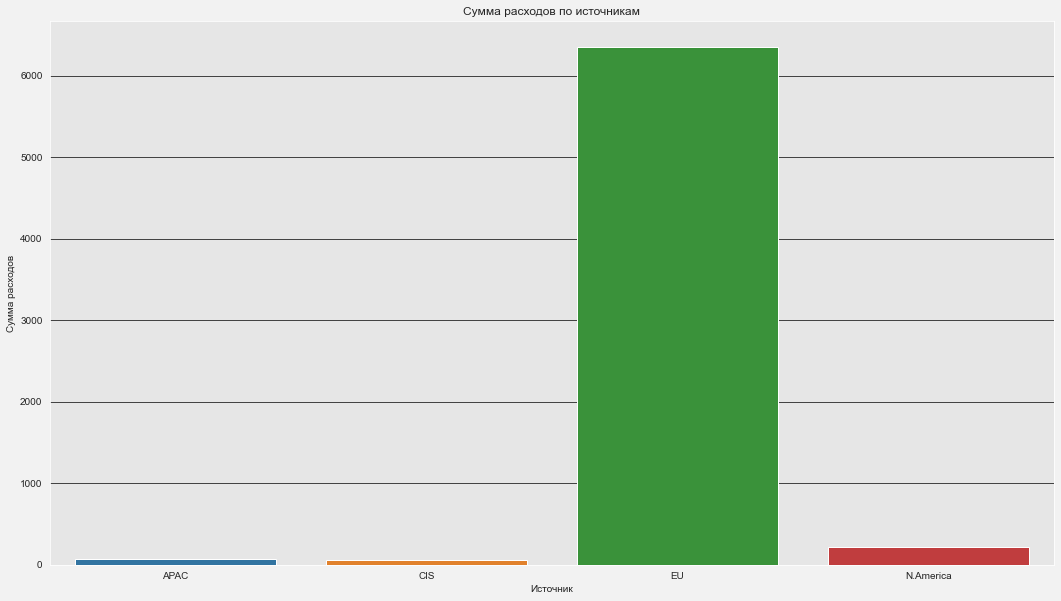

In [34]:
eventsABSystem =  eventsAB.query('ab_test == "recommender_system_test"')

regionCount = eventsABSystem.groupby('region')['user_id'].agg({'nunique'}).reset_index()
sns.set_style('darkgrid',#задаем стили графикам
            {'axes.facecolor': '0.9',
            'grid.color': '0.1',
            'figure.facecolor': '0.95'})
    
plt.figure(figsize=(18,10))
sns.barplot(data=regionCount, x='region', y='nunique')
plt.title("Сумма расходов по источникам")
plt.xlabel("Источник")
plt.ylabel("Сумма расходов");

Рассмотрим распределение по группам, в целом из недостатков теста наблюдается перекос в сторону пользователей из EU, в группе A их 3634 человек, а в группе B - 2717 человек, что меньше на 917 человек.

In [35]:
regionCountAB = eventsABSystem.groupby(['region', 'group'])['user_id'].agg({'nunique'}).reset_index()
regionCountAB

,region,group,nunique
0,APAC,A,37
1,APAC,B,35
2,CIS,A,25
3,CIS,B,30
4,EU,A,3634
5,EU,B,2717
6,N.America,A,128
7,N.America,B,95


In [36]:
# Код ревьюера
usersRegionTest = eventsABSystem[eventsABSystem['region']== "EU"]['user_id'].nunique()
usersRegionTotal = eventsAB[eventsAB['region']== "EU"].query("first_date <= '2020-12-21'")['user_id'].nunique()

print('Доля пользователей, попавших из региона EU {:.1%}'.format(usersRegionTest/usersRegionTotal))

Доля пользователей, попавших из региона EU 15.0%


__Выводы:__
- на основе полученной воронки можно сделать вывод, что много пользователей уходит после залогинивания и просмотра продукции. Меньше половины пользователей из всех переходит на покупку продукции.
- графики по датам показывают нам, что изначально группа B вела по параметру количество событий на пользователя, однако ближе к Новому Году пользователи группы А резко обогнали группу B. 
- мы избавились от пользователей с аномально большой активностью и большой суммой покупок из объединенной группы, а именно избавились от необходимых выбросов.

Из недостатков к проведению теста можно выделить следующее:
- тест совпал с Новогодними праздними и Рождеством в Европе, что сильно искажает результаты теста. На графиках распределения событий видно, что величины так и не установились, и начинается период долгих акций. Время, выбранное для теста, является скорее неудачным. 
- Пользователей в двух пользовательских группах составило 776 человек, если говорить о долях, то доля подобных пользователей в датафрейме eventsAB составляет: 1.3%,  а доля подобных пользователей в тесте recommender_system_test в датафрейме eventsAB составляет: 11.6%. Поэтому решено не выбрасывать эти данные.
- с моей точки зрения аудитория сформирована не очень правильно, практически все из EU, разница между выборкой A и B большая, а именно в группу A вошло 3824 человек, а в группу 2877 человек, что больше на 24%, а оптимальная разница составляет 10%.

## 4. Проверка гипотез и анализ A/B теста <a name="research_analysis"></a> 

Посчитаем сколько пользователей в каждой экспериментальной группе. Для этого создадим словарь, который выведет нам количество участников по каждом группе.

In [37]:
n_users = {
           'count_eventA': eventsA['user_id'].nunique(), 
           'count_eventB': eventsB['user_id'].nunique(),
           'count_regionA': eventsA['user_id'].nunique(), 
           'count_regionB': eventsB['user_id'].nunique(),
          }

groups = ['count_eventA', 'count_eventB']

for g in groups:
    print('В {} находится {} человек'.format(g, n_users[g]))

В count_eventA находится 3824 человек
В count_eventB находится 2877 человек


Посчитаем количество событий по группе A и по группе B. Создадим сводную таблицу по каждой эксперементальной группе 

In [38]:
#Посчитаем количество событий по группе A
eventNameCountFinalANun = finalEventsA.groupby('event_name')['user_id'].agg(['nunique']).reset_index().sort_values(by='nunique', ascending=False)
#Посчитаем количество событий по группе B
eventNameCountFinalBNun = finalEventsB.groupby('event_name')['user_id'].agg(['nunique']).reset_index().sort_values(by='nunique', ascending=False)

eventNameCountAB = eventNameCountFinalANun.merge(eventNameCountFinalBNun, on='event_name')
eventNameCountAB.columns=['event_name', 'count_eventA', 'count_eventB'] 
eventNameCountAB

,event_name,count_eventA,count_eventB
0,login,2411,849
1,product_page,1506,459
2,product_cart,686,218
3,purchase,620,201


Нашей задачей является увеличение количества заказов, соответственно выручки. Поэтому сравним конверсии по действиям, то есть мы рассмотрим как у нас переходят пользователи с одной площадки воронки в следующую. Для этого мы по каждой группе найдем долю пользователей, которые  проходят на следующий шаг воронки.  Затем проведем __z-тест__. Для этого напишем функцию, которая будет нам проверять гипотезы о равенстве долей

In [39]:
#Прописываем функцию, которая нам будет считать Z-текст
def checking_z_value(alpha, data, first_group, second_group, row):
    alpha = alpha # критический уровень статистической значимости
    print('Нулевая гипотеза: отсутствует статистическая разница между долями группы ' + first_group + ' и группы ' + second_group) 
    print('')
    print('Ненулевая гипотеза: присутствует статистическая разница между долями группы ' + first_group + ' и группы ' + second_group) 
    print('')
    print(50*'-')
    for i in data.index:
        # пропорция успехов в первой группе:
        p1 = data[first_group][i]/n_users[first_group]
        
        # пропорция успехов во второй группе:
        p2 = data[second_group][i]/n_users[second_group]
        # пропорция успехов в комбинированном датасете:
        p_combined = (data[first_group][i] + data[second_group][i]) / (n_users[first_group] + n_users[second_group])
        # разница пропорций в датасетах
        difference = p1 - p2 

        # считаем статистику в ст.отклонениях стандартного нормального распределения
        z_value = difference / mth.sqrt(
             p_combined * (1 - p_combined) * (1 / n_users[first_group] + 1 /  n_users[second_group])
        )

        # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
        distr = st.norm(0, 1)

        p_value = (1 - distr.cdf(abs(z_value))) * 2

        print('{} p-значение: {}'.format(data[row][i], p_value))
 
        if p_value < alpha:
           print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
        else:
            print(
              'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
             ) 
        print(50*'-')

#Прописываем функцию, которая будет рисовать нам график воронки     
def go_figure(data, first_group, second_group):
        fig = go.Figure()

        fig.add_trace(go.Funnel(
            name = first_group,
            y = data['event_name'],
            x = data[first_group],
            textposition = "inside",
            textinfo = "value+percent initial",
            connector = {"fillcolor": '#bde0eb'},
            insidetextfont = {'color': 'white', 'size': 14}))

        fig.add_trace(go.Funnel(
             name = second_group,
             y = data['event_name'],
             x = data[second_group],
             textposition = "inside",
             textinfo = "value+percent initial",
             connector = {"fillcolor": '#bde0eb'},
             insidetextfont = {'color': 'white', 'size': 14}))
        
        fig.update_layout(
            title={
                'text':'Сравнение воронок по двум группам: ' + first_group + ' и ' + second_group,
                'y':0.9,
                'x':0.48})
        fig.show(renderer='svg')

Проверим, находят ли статистические критерии разницу между выборками группы A и B/

Нулевая гипотеза: отсутствует статистическая разница между долями группы count_eventA и группы count_eventB

Ненулевая гипотеза: присутствует статистическая разница между долями группы count_eventA и группы count_eventB

--------------------------------------------------
login p-значение: 0.0
Отвергаем нулевую гипотезу: между долями есть значимая разница
--------------------------------------------------
product_page p-значение: 0.0
Отвергаем нулевую гипотезу: между долями есть значимая разница
--------------------------------------------------
product_cart p-значение: 0.0
Отвергаем нулевую гипотезу: между долями есть значимая разница
--------------------------------------------------
purchase p-значение: 0.0
Отвергаем нулевую гипотезу: между долями есть значимая разница
--------------------------------------------------


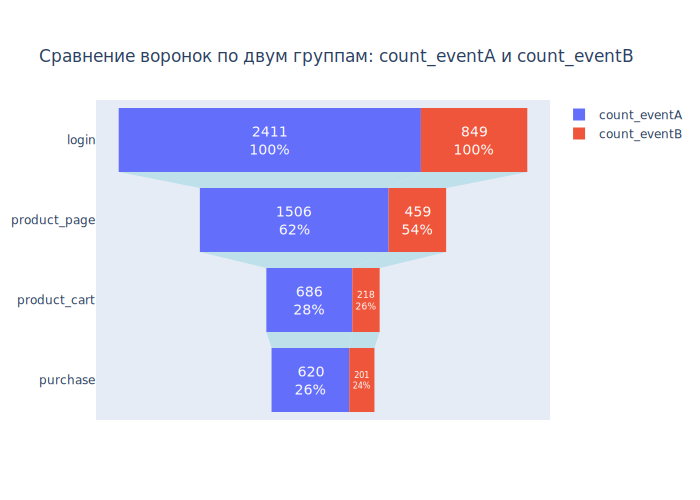

In [40]:
checking_z_value(0.05, eventNameCountAB, 'count_eventA', 'count_eventB', 'event_name')
go_figure(eventNameCountAB,'count_eventA', 'count_eventB')

По всем показателям p-value нулевой, что связано с тем, что огромная часть участников в группе B не совершали ни одного действия. Поэтому везде доли будут разными. 

Посчитаем долю по регионам на основе Z-теста. Для этого также создадим два массива по группе A и группе B в разрезе регионов.

In [41]:
regionCountA = finalEventsA.groupby('region')['user_id'].agg({'nunique'}).reset_index()
regionCountB = finalEventsB.groupby('region')['user_id'].agg({'nunique'}).reset_index()
regionNameCountAB = regionCountA.merge(regionCountB, on='region')
regionNameCountAB.columns=['region', 'count_regionA', 'count_regionB'] 

In [42]:
checking_z_value(0.05, regionNameCountAB, 'count_regionA', 'count_regionB', 'region')

Нулевая гипотеза: отсутствует статистическая разница между долями группы count_regionA и группы count_regionB

Ненулевая гипотеза: присутствует статистическая разница между долями группы count_regionA и группы count_regionB

--------------------------------------------------
APAC p-значение: 0.27625247433391675
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
--------------------------------------------------
CIS p-значение: 0.059917463730778664
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
--------------------------------------------------
EU p-значение: 2.6447954937225404e-11
Отвергаем нулевую гипотезу: между долями есть значимая разница
--------------------------------------------------
N.America p-значение: 0.7197066530503817
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
--------------------------------------------------


По всем рассматриваемым регионам значимая разница отсутствует за исключением EU, здесь была отвергнута нулевая гипотеза, то есть между долями существует значимая разница.

## 5. Выводы проекта <a name="conclusion"></a> 

Исходя из проведенного анализа сделаем следующие выводы:
- перед анализом данных, мы подготовили наши данные, так в некоторых столбцах у нас были заменены все пропущенные значения, а также удалены дубликаты. Изменен тип данных по некоторым столбцам из объекта в дату.
- на основе полученной воронки можно сделать вывод, что много пользователей уходит после залогинивания и просмотра продукции. Меньше половины пользователей из всех переходит на покупку продукции.
- графики по датам показывают нам, что изначально группа B вела по параметру количество событий на пользователя, однако ближе к Новому Году пользователи группы А резко обогнали группу B. Это можно объяснить резкой потребностью товаров в это время, что сильно искажает результаты теста. На этих графиках видно, что величины так и не установились, и начинается период долгих акций. Время, выбранное для теста, является скорее неудачным. 
- мы избавились от пользователей с аномально большой активностью и большой суммой покупок из объединенной группы, а именно избавились от необходимых выбросов.
-  По проведенным двум проверкам гипотез мы  можем сделать вывод, что по долям событий везде между долями наблюдается значительная разница, а по долям региона, только по региону EU существует значительная разница.

В целом вряд ли можно назвать тест достоверным, так как тест совпал с Новогодними праздними и Рождеством в Европе, что сильно могло исказить результат, а также с моей точки зрения аудитория сформирована не очень правильно, практически все из EU, разница между выборкой A и B большая, а именно в группу A вошло 3824 человек, а в группу 2877 человек, что больше на 24%, а оптимальная разница составляет 10%, плюс Z-тест показал существенную разницу между долями в EU. Также между долями событий все p-value  являются нулевыми, что связано с тем, что огромная часть участников в группе B не совершали ни одного действия. 